In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

# Projekt - wizualizacja danych
Celem projektu jest analiza wpływu posiadania wspólnej waluty przez państwa Afryki zachodniej i środkowej na wybrane czynniki ekonomiczne, ze szczególnym uwzględnieniem PKB jako emanacji rozwoju gospodarczego, w okresie 2015 - 2018. Pod uwagę wzięto 26 państw należących do ECOWAS (Wspólnota Gospodarcza Państw Afryki Zachodniej) oraz ECCAS (Wspólnota Gospodarcza Państw Afryki Środkowej). 8 badanych państw posiada wspólną walutę w postaci Zachodnioafrykańskiego Franka CFA (fr. Communauté Financière Africaine), 6 państw posiada Środkowoafrykańskiego Franka CFA (fr. Coopération financière en Afrique centrale), a 12 państw posiada własne waluty krajowe. Dane zostały pobrane ze zbiorów Banku Światowego (https://databank.worldbank.org/).

In [4]:
#Pobranie danych z pliku Excela. 
df = pd.read_excel("Dane_Afryka.xlsx")
df.head()

,Country Name,Country Code,Series Name,2015,2016,2017,2018,Org. międzynarodowa,Waluta
0,Angola,AGO,Domestic credit to private sector (% of GDP),25.240108,21.098410,17.000685,14.935270,ECCAS,Wł.
1,Angola,AGO,Domestic credit to private sector by banks (% ...,24.010776,19.940831,15.920022,13.832310,ECCAS,Wł.
2,Angola,AGO,Broad money (% of GDP),40.944660,39.162308,32.186521,30.646441,ECCAS,Wł.
3,Angola,AGO,"Claims on central government, etc. (% GDP)",1.223081,5.928448,12.273636,9.957990,ECCAS,Wł.
4,Angola,AGO,Exports of goods and services (% of GDP),29.754598,28.124485,29.004102,40.836290,ECCAS,Wł.


In [5]:
#Sprawdzenie czy dane zostały wgrane we własciwym formacie.
df.dtypes

Country Name            object
Country Code            object
Series Name             object
2015                   float64
2016                   float64
2017                   float64
2018                   float64
Org. międzynarodowa     object
Waluta                  object
dtype: object

In [6]:
#Utworzenie ramki danych ułatwiającej wprowadzenie danych do wykresu.
df_m = pd.melt(df, id_vars=["Country Name", "Country Code", "Series Name", "Org. międzynarodowa", "Waluta"],
               var_name="Rok", value_name="Wartość serii")

In [7]:
#Sprawdzenie typów danych makroekonomicznych branych pod uwagę w analizie.
df_m["Series Name"].unique()

array(['Domestic credit to private sector (% of GDP)',
       'Domestic credit to private sector by banks (% of GDP)',
       'Broad money (% of GDP)',
       'Claims on central government, etc. (% GDP)',
       'Exports of goods and services (% of GDP)',
       'Final consumption expenditure (% of GDP)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Foreign direct investment, net outflows (% of GDP)',
       'GDP growth (annual %)', 'GDP per capita growth (annual %)',
       'Gross capital formation (% of GDP)',
       'Gross domestic savings (% of GDP)',
       'Gross national expenditure (% of GDP)',
       'Gross savings (% of GDP)',
       'Imports of goods and services (% of GDP)',
       'Industry (including construction), value added (% of GDP)',
       'Monetary Sector credit to private sector (% GDP)',
       'Total natural resources rents (% of GDP)'], dtype=object)

In [13]:
#Kolejna ranka danych w formacie ułatwiającym pokazanie danych na wykresie.
df_p = df_m.pivot_table(index=['Country Name', 'Country Code', 'Org. międzynarodowa', 'Waluta', 'Rok'],
                        columns='Series Name', values='Wartość serii', aggfunc='sum').reset_index()
df_p.head()

Series Name,Country Name,Country Code,Org. międzynarodowa,Waluta,Rok,Broad money (% of GDP),"Claims on central government, etc. (% GDP)",Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),Exports of goods and services (% of GDP),...,GDP growth (annual %),GDP per capita growth (annual %),Gross capital formation (% of GDP),Gross domestic savings (% of GDP),Gross national expenditure (% of GDP),Gross savings (% of GDP),Imports of goods and services (% of GDP),"Industry (including construction), value added (% of GDP)",Monetary Sector credit to private sector (% GDP),Total natural resources rents (% of GDP)
0,Angola,AGO,ECCAS,Wł.,2015,40.944660,1.223081,25.240108,24.010776,29.754598,...,0.943572,-2.642975,34.202491,30.823171,103.379320,24.817555,33.133918,41.933092,24.045538,13.305675
1,Angola,AGO,ECCAS,Wł.,2016,39.162308,5.928448,21.098410,19.940831,28.124485,...,-2.580111,-6.011891,27.214709,30.093516,97.121193,24.017490,25.245673,42.643568,19.990007,20.885120
2,Angola,AGO,ECCAS,Wł.,2017,32.186521,12.273636,17.000685,15.920022,29.004102,...,-0.147150,-3.630695,24.130306,29.881683,94.248623,23.099669,23.252720,42.167954,16.199090,25.950330
3,Angola,AGO,ECCAS,Wł.,2018,30.646441,9.957990,14.935270,13.832310,40.836290,...,-1.316362,-4.676670,17.869421,33.163991,84.705430,25.099924,25.541723,47.931542,14.021780,32.045406
4,Benin,BEN,ECOWAS,XOF,2015,30.984761,-1.881087,16.735706,16.641874,24.720451,...,1.778151,-1.181685,20.731792,13.416456,107.315336,13.862030,32.035862,16.385095,16.735706,4.300303


In [45]:
df_p.dtypes

Series Name
Country Name                                                  object
Country Code                                                  object
Org. międzynarodowa                                           object
Waluta                                                        object
Rok                                                            int64
Broad money (% of GDP)                                       float64
Claims on central government, etc. (% GDP)                   float64
Domestic credit to private sector (% of GDP)                 float64
Domestic credit to private sector by banks (% of GDP)        float64
Exports of goods and services (% of GDP)                     float64
Final consumption expenditure (% of GDP)                     float64
Foreign direct investment, net inflows (% of GDP)            float64
Foreign direct investment, net outflows (% of GDP)           float64
GDP growth (annual %)                                        float64
GDP per capita growth 

In [9]:
#Sprawdzenie liczby braków danych.
df.isna().sum()

Country Name            0
Country Code            0
Series Name             0
2015                   33
2016                   33
2017                   29
2018                   30
Org. międzynarodowa     0
Waluta                  0
dtype: int64

In [17]:
#Wykres ilustrujący braki danych.
df["Braki"] = df.iloc[:, 3:7].isna().sum(axis=1)
df_b = df[df["Braki"] != 0]
df_b = df_b.groupby("Country Name").agg({'Braki': 'sum', 'Org. międzynarodowa': 'first', 'Waluta': 'first'}).reset_index()

fig = px.sunburst(df_b, 
                  path=["Org. międzynarodowa", "Waluta", "Country Name"],
                  values="Braki",
                  title="Ilość braków danych dla poszczególnych państw",
                  color = "Braki",
                  color_continuous_scale="Reds",
                  width=700, height=700)
fig.show()

Z powyższego wykresu wynika, że państwa posiadające własną walutę mają mniej dokładne raportowanie danych makroekonomicznych. Warto również zwrócić uwagę że nie występują żadne braki danych dla państw posiadających XOF, co można interpretować jako bardziej rzetelne podejście do raportowania danych przez państwa posiadające Zachodnioafrykańskiego Franka CFA.

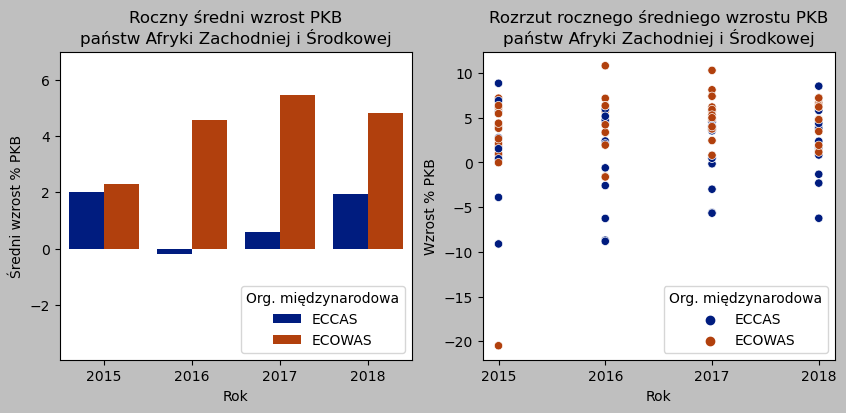

In [12]:
#Wykres ilustrujący wzrost PKB dla badanych państw w latach 2015 - 2018.
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Roczny średni wzrost PKB\npaństw Afryki Zachodniej i Środkowej")
sns.barplot(data=df_m[df_m["Series Name"] == "GDP growth (annual %)"],
            y='Wartość serii', x='Rok',
            hue='Org. międzynarodowa',
            palette='dark',
            saturation=1,
            errwidth=0)
plt.ylabel("Średni wzrost % PKB")

plt.subplot(1,2,2)
plt.title("Rozrzut rocznego wzrostu PKB\npaństw Afryki Zachodniej i Środkowej")
sns.scatterplot(data=df_m[df_m["Series Name"] == "GDP growth (annual %)"],
               x='Rok', y='Wartość serii',
               hue='Org. międzynarodowa',
               palette='dark'
               )
plt.xticks(ticks = [2015, 2016, 2017, 2018],
           labels = ["2015", "2016", "2017", "2018"])
plt.ylabel("Wzrost % PKB")

plt.show()

Państwa zachodnioafrykańskie średnio rozwijały się szybciej przez cały badany okres. Jedynie w 2015 roku różnica we wzroście PKB była niewielka, choć wpływało na to jedno państwo, które zanotowało 20-procentowy spadek PKB. Państwa środkowoafrykańskie radziły sobie słabiej w rozwoju gospodarczym i przez lata 2016 - 2018, 3 z tych krajów zajmowały najniższe pozycje we wzroście PKB.

In [16]:
#Wykres ilustrujący wzrost PKB w badanycm okresie dla poszczególnych lat, z wyróżnieniem waluty posiadanej przez państwo oraz przynależności do organizacji regionalnej.
skala = (df_p["GDP growth (annual %)"].max() - df_p["GDP growth (annual %)"].min())
zero = -df_p["GDP growth (annual %)"].min()/skala
dwaplus = (skala + (2 - df_p["GDP growth (annual %)"].max()))/skala
dwamin = (skala + (-2 - df_p["GDP growth (annual %)"].max()))/skala
fig = px.parallel_categories(df_p,
                            dimensions=df_p.columns[2:5],
                            color = "GDP growth (annual %)",
                            color_continuous_scale=[(0, "darkred"),(dwamin, "red"), (dwamin, "yellow"),
                                                    (dwaplus, "yellow") ,  (dwaplus, "#AAFF00"), (1, "darkgreen")],
                            title = "Wzrost PKB dla państw ECCAS i ECOWAS"
                            )

fig.show()

Z powyższego wykresu wynika że wspólna waluta działa inaczej w państwach środkowo- i zachodnioafrykańskich. Państwa środkowoafdrykańskie, które przyjęły Franka CFA, wzrost PKB był generalnie słabszy niż w państwach które posiadały walutę narodową. Z kolei państwa zachodnioafrykańskie - które posiadały wspólną walutę - rozwijały się szybciej niż państwa, które utrzymały walutę krajową.

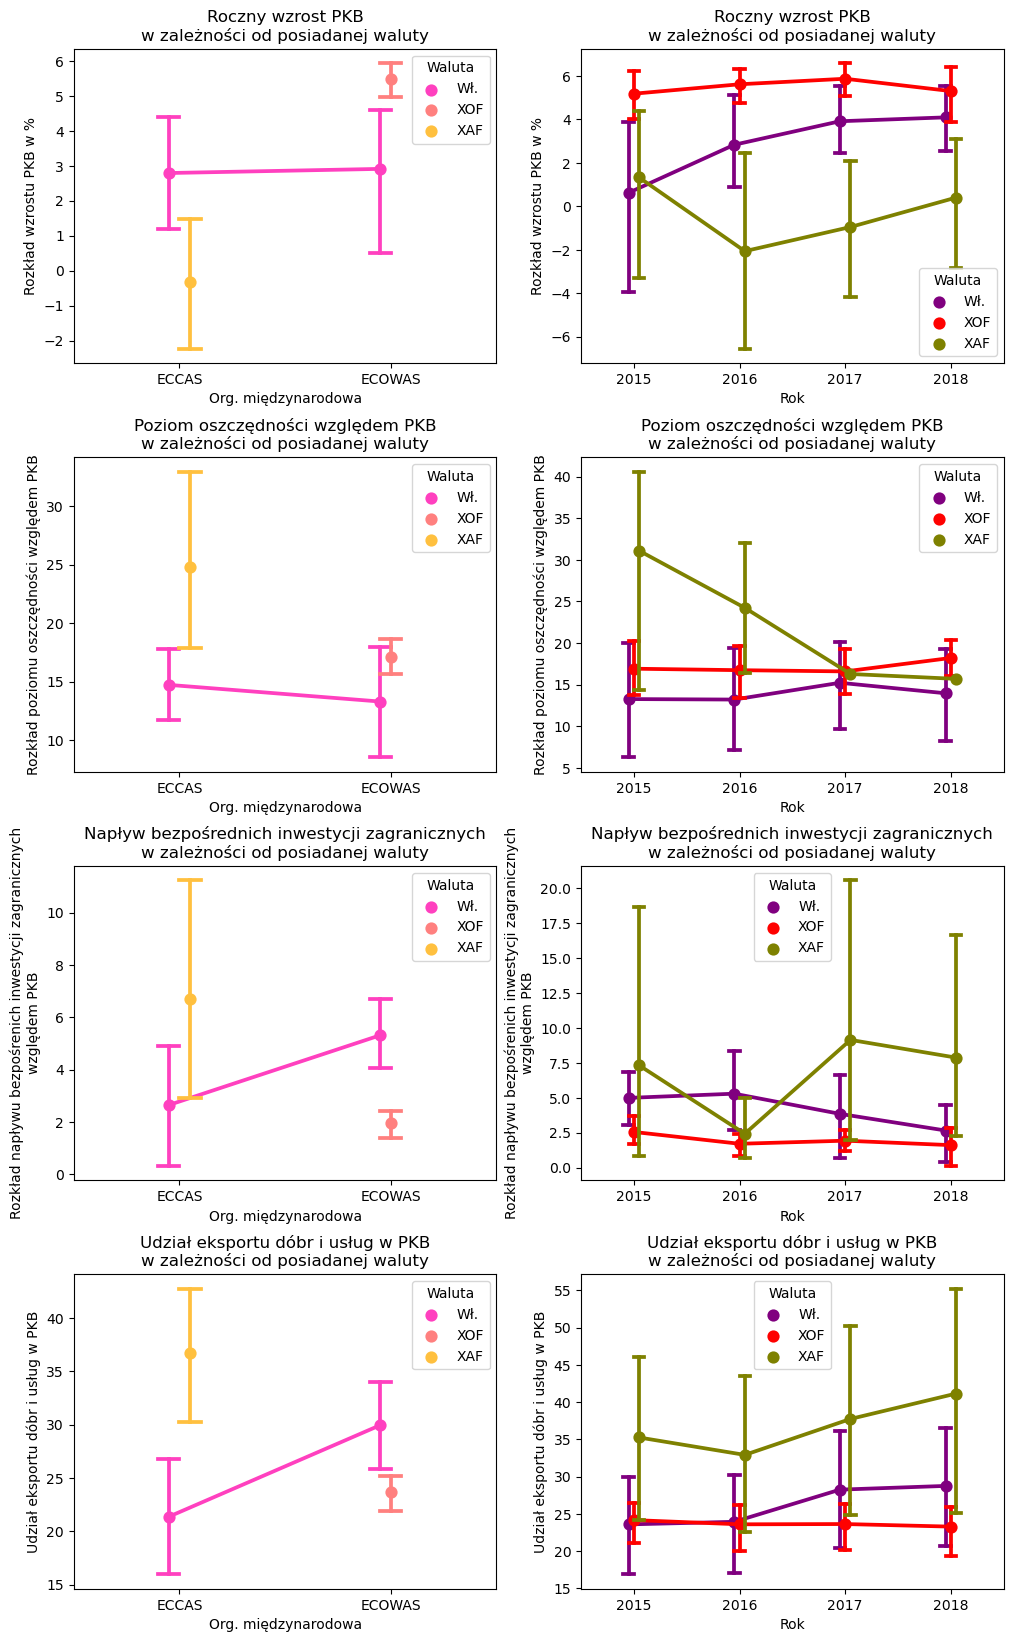

In [11]:
#Wykresy ilustrujące wpływ posiadania rodzaju waluty na wybrane zmienne ekonomiczne z wyróżnieniem lat i przynależności do organizacji regionalnej.
plt.figure(figsize=(12,20))
plt.style.use("grayscale")
plt.subplot(4,2,1)

plt.subplots_adjust(hspace=0.3)

plt.title("Roczny wzrost PKB\nw zależności od posiadanej waluty")
sns.pointplot(data=df_m[df_m["Series Name"] == "GDP growth (annual %)"],
              x="Org. międzynarodowa", y="Wartość serii",
              hue='Waluta',
              dodge=0.1,
              palette='spring',
              capsize=0.1)
plt.ylabel("Rozkład wzrostu PKB w %")

plt.subplot(4,2,2)
plt.title("Roczny wzrost PKB\nw zależności od posiadanej waluty")
sns.pointplot(data=df_m[df_m["Series Name"] == "GDP growth (annual %)"],
              x="Rok", y="Wartość serii",
              hue='Waluta',
              dodge=0.1,
              palette='brg',
              capsize=0.1)
plt.ylabel("Rozkład wzrostu PKB w %")

plt.subplot(4,2,3)
plt.title("Poziom oszczędności względem PKB\nw zależności od posiadanej waluty")
sns.pointplot(data=df_m[df_m["Series Name"] == "Gross savings (% of GDP)"],
              x="Org. międzynarodowa", y="Wartość serii",
              hue='Waluta',
              dodge=0.1,
              palette='spring',
              capsize=0.1)
plt.ylabel("Rozkład poziomu oszczędności względem PKB")

plt.subplot(4,2,4)
plt.title("Poziom oszczędności względem PKB\nw zależności od posiadanej waluty")
sns.pointplot(data=df_m[df_m["Series Name"] == "Gross savings (% of GDP)"],
              x="Rok", y="Wartość serii",
              hue='Waluta',
              dodge=0.1,
              palette='brg',
              capsize=0.1)
plt.ylabel("Rozkład poziomu oszczędności względem PKB")

plt.subplot(4,2,5)
plt.title("Napływ bezpośrednich inwestycji zagranicznych\nw zależności od posiadanej waluty")
sns.pointplot(data=df_m[df_m["Series Name"] == "Foreign direct investment, net inflows (% of GDP)"],
              x="Org. międzynarodowa", y="Wartość serii",
              hue='Waluta',
              dodge=0.1,
              palette='spring',
              capsize=0.1)
plt.ylabel("Rozkład napływu bezpośrenich inwestycji zagranicznych\nwzględem PKB")

plt.subplot(4,2,6)
plt.title("Napływ bezpośrednich inwestycji zagranicznych\nw zależności od posiadanej waluty")
sns.pointplot(data=df_m[df_m["Series Name"] == "Foreign direct investment, net inflows (% of GDP)"],
              x="Rok", y="Wartość serii",
              hue='Waluta',
              dodge=0.1,
              palette='brg',
              capsize=0.1)
plt.ylabel("Rozkład napływu bezpośrenich inwestycji zagranicznych\nwzględem PKB")

plt.subplot(4,2,7)
plt.title("Udział eksportu dóbr i usług w PKB\nw zależności od posiadanej waluty")
sns.pointplot(data=df_m[df_m["Series Name"] == "Exports of goods and services (% of GDP)"],
              x="Org. międzynarodowa", y="Wartość serii",
              hue='Waluta',
              dodge=0.1,
              palette='spring',
              capsize=0.1)
plt.ylabel("Udział eksportu dóbr i usług w PKB")

plt.subplot(4,2,8)
plt.title("Udział eksportu dóbr i usług w PKB\nw zależności od posiadanej waluty")
sns.pointplot(data=df_m[df_m["Series Name"] == "Exports of goods and services (% of GDP)"],
              x="Rok", y="Wartość serii",
              hue='Waluta',
              dodge=0.1,
              palette='brg',
              capsize=0.1)
plt.ylabel("Udział eksportu dóbr i usług w PKB")

plt.show()

Wykres ilustruje że posiadanie Zachodnioafrykańskiego Franka CFA sprzyjało wzrostowi PKB. Wpływ ten pozostał na podobnym poziomie przez cały badany okres. Państwa posiadające waluty własne rozwijały się w podobnym tempie, niezależnie od przynależności do organizacji regionalej. Ponadto państwa posiadające własne waluty zaczęły rozwijać się coraz szybciej w badanym okresie i dla roku 2018, różnica między wzrostem PKB między państwami posiadającymi własną walutę, a XOF była niewielka. Z kolei posiadanie Środkowoafrykańskiego Franka CFA nie sprzyjało rozwojowi. Jedynie w roku 2015 XAF mógł się równać rozwojowi w państwach z walutami narodowymi.
<br/><br/>
Posiadanie zrówno Zachodnioafrykańskiego Franka CFA jak i waluty narodowej nie sprzyjało zwiększeniu stopy oszczędności. Z kolei państwa posiadające XAF miały na początku okresu wyższy poziom oszczędności, jednak później wystąpił spadek. Warto zaznaczyć że wykres dla lat 2017-2018 nie pokazuje zakresu dla państw posiadających XAF, dlatego ta różnica jest prawdopodobnie wynikiem braków danych.
<br/><br/>
Państwa posiadające XAF skuteczniej przyciągały BIZ niż państwa posiadające XOF. Państwa środkowoafrykańskiej unii walutowej jedynie w 2016 roku zanotowały znaczący spadek napływu BIZ. Z kolei państwa posiadające waluty narodowe radziły sobie podobnie jak państwa posiadające XOF w przyciąganiu inwestycji zagranicznych, choć spośród nich nieco lepiej radziły sobie pod tym względem państwa zachodnioafrykańskie.
<br/><br/>
Państwa posiadające XAF w badanym okresie były gospodarkami bazującymi na eksporcie. Ponadto udział esportu w ich PKB rósł w badanym okresie. Państwa posiadające XOF oraz środkowoafrykańskie państwa z walutami narodowymi miały podobny udział eksportu w PKB. Z kolei zachodnioafrykańskie państwa posadające walutę narodową miały wyższy udział eksportu w PKB.

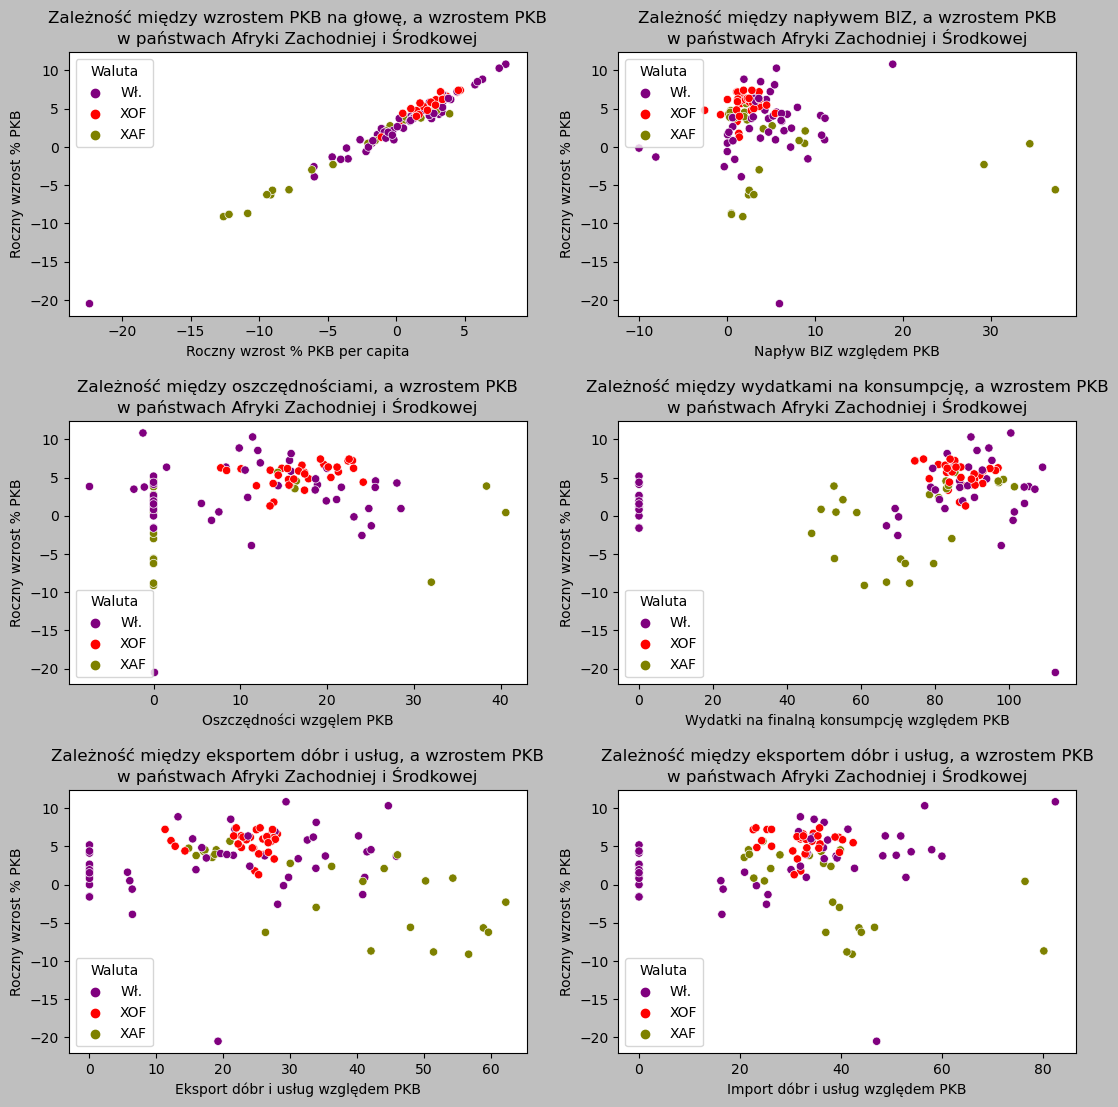

In [15]:
#Wykresy ilustrujące zależności między daną zmienną makroekonomiczną, a wzrostem PKB z wyróżnieniem posiadanego typu waluty.
plt.figure(figsize = (13,13))
plt.subplots_adjust(hspace=0.4)

plt.subplot(3,2,1)
plt.title("Zależność między wzrostem PKB na głowę, a wzrostem PKB\nw państwach Afryki Zachodniej i Środkowej")
sns.scatterplot(data=df_p,
                x="GDP per capita growth (annual %)",
                y="GDP growth (annual %)",
                hue="Waluta",
                palette='brg',
                )
plt.xlabel("Roczny wzrost % PKB per capita")
plt.ylabel("Roczny wzrost % PKB")

plt.subplot(3,2,3)
plt.title("Zależność między oszczędnościami, a wzrostem PKB\nw państwach Afryki Zachodniej i Środkowej")
sns.scatterplot(data=df_p,
                x="Gross savings (% of GDP)",
                y="GDP growth (annual %)",
                hue="Waluta",
                palette='brg',
                )
plt.xlabel("Oszczędności wzgęlem PKB")
plt.ylabel("Roczny wzrost % PKB")

plt.subplot(3,2,2)
plt.title("Zależność między napływem BIZ, a wzrostem PKB\nw państwach Afryki Zachodniej i Środkowej")
sns.scatterplot(data=df_p,
                x="Foreign direct investment, net inflows (% of GDP)",
                y="GDP growth (annual %)",
                hue="Waluta",
                palette='brg',
                )
plt.xlabel("Napływ BIZ względem PKB")
plt.ylabel("Roczny wzrost % PKB")

plt.subplot(3,2,5)
plt.title("Zależność między eksportem dóbr i usług, a wzrostem PKB\nw państwach Afryki Zachodniej i Środkowej")
sns.scatterplot(data=df_p,
                x="Exports of goods and services (% of GDP)",
                y="GDP growth (annual %)",
                hue="Waluta",
                palette='brg',
                )
plt.xlabel("Eksport dóbr i usług względem PKB")
plt.ylabel("Roczny wzrost % PKB")

plt.subplot(3,2,4)
plt.title("Zależność między wydatkami na konsumpcję, a wzrostem PKB\nw państwach Afryki Zachodniej i Środkowej")
sns.scatterplot(data=df_p,
                x="Final consumption expenditure (% of GDP)",
                y="GDP growth (annual %)",
                hue="Waluta",
                palette='brg',
                )
plt.xlabel("Wydatki na finalną konsumpcję względem PKB")
plt.ylabel("Roczny wzrost % PKB")

plt.subplot(3,2,6)
plt.title("Zależność między eksportem dóbr i usług, a wzrostem PKB\nw państwach Afryki Zachodniej i Środkowej")
sns.scatterplot(data=df_p,
                x="Imports of goods and services (% of GDP)",
                y="GDP growth (annual %)",
                hue="Waluta",
                palette='brg',
                )
plt.xlabel("Import dóbr i usług względem PKB")
plt.ylabel("Roczny wzrost % PKB")

plt.show()

Istnieje silna zależność między wzrostem PKB ogólnego, a PKB per capita. Oznacza to że jeżeli dane państwo osiągało dodatni wzrost gospodarczy, to na ogół w swoim tempie wychodziło z pułapki maltuzjańskiej.
<br/><br/>
Z danych dla badanego okresu wynika że nie istniała krótkooresowa zależność między wzrostem PKB, a napływem bezpośrednich inwestycji zagranicznych. Z danych wynika że istnieje lekka ujemna zależność między wzrostem PKB, a poziomem oszczędności. Istnieje z kolei dodatnia zależność między wydatkami na konsumpcję a wzrostem PKB. Istnieje wyraźnie ujemna zależność między udziałem eksportu w PKB, a wzrostem PKB. Z kolei import nie wykazywał jednoznacznego wpływu na wzrost gospodarczy badanych państw.
<br/><br/>
Powyższą analizę możemy streścić stwierdzeniem, że państwa stawiające na rozwój rynku wewnętrznego rozwijały się szybciej niż państwa stawiające na eksport, oszczędności czy inwestycje zagraniczne.
<br/><br/>
Warto również zwrócić uwagę, że pańmstwa posiadające Zachoidnioafrykańskiego Franka CFA mają mniej rozproszone dane dla badanego okresu, w stosunku do państw posiadających Środkowoafrykańskiego Franka CFA. Oznacza to że zachodnioafrykańskie państwa tworzące unię walutową są gospodarkami o bardziej zbliżonym profilu.
<br/><br/>
Dla niektórych państw posiadających walutę narodową mógł wystąpić błąd - jeżeli wartość danej zmiennej wynosiła 0, co dla byłoby niemożliwe dla eksportu, importu, i konsumpcji.

In [44]:
#Wykres ilustrujący zależność nakładów inwestycyjnych na majątek trwały, w zależności od danych finansowych i zysku z wydobycia surowców.
fig = px.scatter_3d(df_p,
                    x='Broad money (% of GDP)',
                    y='Domestic credit to private sector (% of GDP)',
                    z='Gross capital formation (% of GDP)',
                    color = "Total natural resources rents (% of GDP)",
                    opacity = 0.75,
                    width=1000, height=700,
                    symbol='Waluta',
                    size_max=5,
                    color_continuous_scale=[(0, "#4682B4"), (0.5, "yellow"), (1, "darkred")])

fig.update_layout(title=dict(text=f"Zależność między nakładami na majątek trwały a<br>względną podażą pieniądza, względną wartością kredytów udzieloną sektorowi prywatnemu<br>oraz zysku z wydobycia zasobów naturalnych<br>państw Afryki Zachodniej i Środkowej",
                             font=dict(size=18), yref='paper'),
                  legend=dict(traceorder='normal',
                              orientation='h',
                              y=-0.1),
                  legend_title_text='Waluta',
                  scene=dict(xaxis = dict(title="Podaż szerokiego pieniądza<br>% względem PKB"),
                             yaxis = dict(title="Podaż krajowych kredytów dla sektora prywatnego<br>% względem PKB"),
                             zaxis = dict(title="Nakłady na majątek trwały<br>% względem PKB")),
                  coloraxis_colorbar=dict(title="Udział % zysku z wydobycia<br>surowców naturalnych względem PKB")
                  )
fig.show()   

Celem ostatniego wykresy jest zbadanie wpływu czynników finansowych i wydobycia surowców na nakłady na majątek trwały - który w długim okresie decyduje o wzroście gospodarczym. Na wstępie trzeba zaznaczyć, że dla tutaj również widoczne są braki danych dla państw z walutami narodowymi oraz niskimi wpływami z wydobycia surowców.
<br/><br/>
Możemy zauważyć silną korelację między podażą kredytów dla sektora prywatnego oraz podażą szerokiego pieniądza. Państwa posiadające wyższe wpływy z wydobycia surowców posiadają mniejszą podaż pieniądza i kredytów dla sektora prywatnego względem PKB. Prawdopodobnie wpływy z surowców, pozwalają im finansować się bez zaciągania zobowiązań. Z kolei państwa posiadające małe wpływy z surowców posiadają lekką zależność między podażą kredytów, a poziomem inwestycji w majętek trwały. Koniec końców jednak mają państwa z niskimi wpływami z surowców mają podobne nakłady na inwestycje w środki trwałe, co oznacza że mają po prostu inny model finansowania. Ponadto państwa które finansują inwestycje kredytem zamiast rentą z surowców, to głównie państwa posiadające XOF - dla nich również zależność między kredytem, a nakładami na majątek trwały jest silniejsza.
<br/><br/>
Znów okazuje się że państwa mające XOF mają bardziej skupione dane, co zponownie obrazuje że są to gospodarki o zbliżonym profilu.

## Podsumowanie i wnioski
1. Państwa posiadające własną walutę mają więcej braków danych i bardziej niedbale przesyłają dane do Banku Światowego. Najbardziej rzetelnie do przesłania danych podchodzą państwa zachodnioafrykańskiej unii monetarnej.
2. Obie analizowane unie monetarne działały inaczej. Unia państw posiadających XOF rozwijała się najszybciej z analizowanych państw, z kolei państwa XAF rozwijały się najwolniej. Może być to wynik to wynik dwóch czynników: 1) państwa o bardziej zbliżonym profilu gospodarczym 2) państwa te przyjeły model rozwoju oparty o rozbudowę rynku wewnętrznego, zamiast eksportu lub pozyskaniu BIZ. Medel ten okazał się skuteczniejszym motorem rozwoju, a przy tym ceteris paribus dla identycznego poziomu PKB per capita powinien zapewnić wyższy poziom życia.
3. W okresie 2015 - 2018 państwa ECOWAS i ECCAS wychodziły z pułapki maltuzjańskiej - co oznacza że wzrost demograficzny nie "zjadał" wzrostu PKB. 
4. Państwa przyjeły dwa modele finansowania inwestycji w trwałe dobra kapitałowe: 1) państwa posiadające gdzie zyski z surowców stanowią znaczący udział w PKB finansują inwestucje w środki trwałe bez kredytu 2) państwa nie posiadające znaczących zysków z surowców w PKB, mają większą względną podaż kredytu, co pozwala im osiągać nawet wyższe stopy inwestycji w środki trwałe niż państw surowcowe.
5. Państwa XOF posiadające niski udział zysków z surowców w PKB mają silniejszą relację między kredytem a inwestycją w kapitał stały. Oznacza to że unia walutowa zwiększa sprzyja możliwości finansowania się gospodarkom tych państw przez kredyt, gospodarkom nieposiadającym surowców.
6. Dla badanych państw lepiej jest posiadać własną walutę niż wchodzić w unię walutową z gospodarkami rozbieżnymi.